---
title: "LOCZCIT-IQR - Workflow Completo"
format:
  pdf:
    papersize: letter
    geometry: landscape
---

# LOCZCIT-IQR - Workflow Completo 
***(Apenas um exemplo de fluxo de trabalho. Pois o operacional pode adapatar o monitoramento conforme a necissidade do colegiado)***

***Autor: Elivaldo Carvalho Rocha***

## Exemplos Práticos da Metodologia para Identificação da ZCIT

Este documento demonstra o workflow completo da metodologia LOCZCIT-IQR para identificação da Zona de Convergência Intertropical (ZCIT) usando:
- **Core**: data_loader, processor, iqr_detector, spline_interpolator
- **Utils**: funções de pentadas e validadores
- **Plotting**: visualização dos resultados

**Analogia Principal**: Imagine a metodologia LOCZCIT-IQR como uma **linha de produção industrial** onde:
1. 🔧 **processor** = Operador que prepara e organiza a matéria-prima (dados OLR em pentadas)
2. 🔍 **iqr_detector** = Inspetor de qualidade que remove produtos defeituosos (outliers)
3. ✏️ **spline_interpolator** = Artesão que cria a linha suave final (interpolação)
4. 📊 **visualizer** = Designer que apresenta o produto final de forma elegante

---

In [65]:
import loczcit_iqr as lz

# Ver guia interativo
lz.quick_start_guide()

# Verificar módulos disponíveis
lz.check_modules()

🌊 LOCZCIT-IQR - Guia Rápido de Uso
📚 Biblioteca para análise da ZCIT com detecção IQR de outliers

🚀 ANÁLISE RÁPIDA (3 passos):
   1️⃣  import loczcit_iqr as lz
   2️⃣  coords = lz.DataProcessor().find_minimum_coordinates(data)
   3️⃣  status = lz.analise_zcit_rapida(-0.5, 3)  # lat, mês

📊 CARREGAMENTO DE DADOS:
   loader = lz.NOAADataLoader()
   data = loader.load_data('2024-03-01', '2024-03-31')
   # Busca automática + download + processamento

🔍 DETECÇÃO DE OUTLIERS:
   detector = lz.IQRDetector(constant=1.5)
   validos, outliers, stats = detector.detect_outliers(coords)
   # Método IQR científico para dados climáticos

📈 INTERPOLAÇÃO E LINHAS:
   interpolator = lz.SplineInterpolator()
   linha_zcit, estatisticas = interpolator.interpolate(coords)
   # Cria linhas suaves da ZCIT

🎨 VISUALIZAÇÃO PROFISSIONAL:
   viz = lz.ZCITVisualizer(template='publication')
   fig, ax = viz.quick_plot(data, pentada=30)
   # Mapas prontos para artigos científicos

🌡️ ANÁLISE CLIMATOLÓGICA:
   # Com

{'core': {'data_loader': True,
  'processor': True,
  'iqr_detector': True,
  'spline_interpolator': True,
  'climatologia': True,
  'all_available': True},
 'plotting': {'visualizer': True, 'style': True, 'all_available': True},
 'utils': {'pentadas': True, 'validators': True, 'all_available': True}}

## 📦 1. Importações e Setup Inicial

In [49]:
# Importações principais
import loczcit_iqr as lz
from datetime import datetime
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
import os

# Configurar logging para ver detalhes
import logging
logging.basicConfig(level=logging.INFO)

# Verificar módulos disponíveis
print("\n📊 Verificando módulos LOCZCIT-IQR...\n")
status = lz.check_modules()

print("\n✅ Setup inicial completo!")


📊 Verificando módulos LOCZCIT-IQR...

🌊 LOCZCIT-IQR - Status dos Módulos

📦 CORE:
   ✅ data_loader
   ✅ processor
   ✅ iqr_detector
   ✅ spline_interpolator
   ✅ climatologia
   ✅ Status core: Completo

📦 PLOTTING:
   ✅ visualizer
   ✅ style
   ✅ Status plotting: Completo

📦 UTILS:
   ✅ pentadas
   ✅ validators
   ✅ Status utils: Completo

💡 RECOMENDAÇÕES:
   🎉 Todos os módulos estão funcionando perfeitamente!

📚 Para começar, use: lz.quick_start_guide()

✅ Setup inicial completo!


---

## 🌡️ 2. Carregamento dos Dados OLR

**Analogia**: Esta etapa é como **receber a matéria-prima na fábrica** - precisamos dos dados brutos de radiação para começar a processar.

In [66]:
# Criar instância do loader
loader = lz.NOAADataLoader(cache_dir='./data_cache')

# Definir período de análise
ano = 2022
start_date = f'{ano}-01-01'
end_date = f'{ano}-12-31'

print(f"📡 Carregando dados OLR para {ano}...\n")

# Carregar dados com a estratégia de dupla escala
# Retorna: (dados_globais, dados_area_estudo)
dados_globais, dados_area = loader.load_data_dual_scale(
    start_date=start_date,
    end_date=end_date,
    study_area=None,  # Usa geometria padrão
    auto_download=True,
    quality_control=True,
    remove_leap_days=True,
    return_study_area_subset=True,
    mask_to_shape=True
)

print(f"\n✅ Dados carregados com sucesso!")
print(f"📊 Dados globais: {dados_globais.dims}")
print(f"📊 Dados área de estudo: {dados_area.dims}")

2025-10-05 16:31:03,973 - loczcit_iqr.core.data_loader - INFO - 🌍 Carregando dados com estratégia dupla escala...
INFO:loczcit_iqr.core.data_loader:🌍 Carregando dados com estratégia dupla escala...
2025-10-05 16:31:03,976 - loczcit_iqr.core.data_loader - INFO - 🏪 ETAPA 0: Verificando cache local primeiro...
INFO:loczcit_iqr.core.data_loader:🏪 ETAPA 0: Verificando cache local primeiro...
2025-10-05 16:31:03,978 - loczcit_iqr.core.data_loader - INFO - 📋 Encontrados 3 arquivos em cache
INFO:loczcit_iqr.core.data_loader:📋 Encontrados 3 arquivos em cache
2025-10-05 16:31:03,980 - loczcit_iqr.core.data_loader - INFO - 🔍 Procurando arquivos do ano no cache...
INFO:loczcit_iqr.core.data_loader:🔍 Procurando arquivos do ano no cache...
2025-10-05 16:31:03,981 - loczcit_iqr.core.data_loader - INFO - 📞 Não encontrado no cache. Consultando servidor NOAA...
INFO:loczcit_iqr.core.data_loader:📞 Não encontrado no cache. Consultando servidor NOAA...


📡 Carregando dados OLR para 2022...



2025-10-05 16:31:06,209 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_20220101_20221231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_20220101_20221231.nc
2025-10-05 16:31:06,210 - loczcit_iqr.core.data_loader - INFO - ⬇️ Baixando arquivo: olr-daily_v01r02_20220101_20221231.nc
INFO:loczcit_iqr.core.data_loader:⬇️ Baixando arquivo: olr-daily_v01r02_20220101_20221231.nc
2025-10-05 16:31:06,971 - loczcit_iqr.core.data_loader - INFO - Download tentativa 1/3: olr-daily_v01r02_20220101_20221231.nc
INFO:loczcit_iqr.core.data_loader:Download tentativa 1/3: olr-daily_v01r02_20220101_20221231.nc
olr-daily_v01r02_20220101_20221231.nc: 100%|██████████| 94.6M/94.6M [00:16<00:00, 5.71MB/s]
2025-10-05 16:31:24,646 - loczcit_iqr.core.data_loader - INFO - Download concluído: data_cache\olr-daily_v01r02_20220101_20221231.nc
INFO:loczcit_iqr.core.data_loader:Download concluído: data_cache\olr-daily_v01r02_20220101_20221231.nc
2025

✅ Dados globais: Frozen({'time': 365, 'lat': 180, 'lon': 360, 'bnds': 2})
✅ Study area: Frozen({'time': 365, 'lat': 25, 'lon': 38, 'bnds': 2})

✅ Dados carregados com sucesso!
📊 Dados globais: FrozenMappingWarningOnValuesAccess({'time': 365, 'lat': 180, 'lon': 360, 'bnds': 2})
📊 Dados área de estudo: FrozenMappingWarningOnValuesAccess({'time': 365, 'lat': 25, 'lon': 38, 'bnds': 2})


---

## 🔧 3. Processamento em Pentadas (processor)

**Analogia**: O **processor** é como um **operador de máquina** que:
- Corta a matéria-prima em pedaços uniformes (pentadas de 5-6 dias)
- Organiza cada peça em uma esteira de produção numerada (pentada 1, 2, 3...)
- Garante que cada peça esteja dentro das especificações de qualidade

**Pentadas**: Períodos de 5-6 dias que facilitam análises climáticas (72-73 pentadas por ano).


In [67]:
# Criar instância do DataProcessor
processor = lz.DataProcessor(
    use_dask=True,
    n_workers=4
)

print(f"🔧 Processando dados em pentadas para {ano}...\n")

# Criar pentadas dos dados da área de estudo
pentadas_dataset = processor.create_pentads(
    olr_data = dados_area,
    year = ano,
    remove_leap_days = True,
    method = 'mean',  # Média dos valores em cada pentada
    min_days_required = 3
)

print(f"\n✅ Pentadas criadas!")
print(f"📊 Dimensões: {pentadas_dataset.dims}")
print(f"📊 Variáveis: {list(pentadas_dataset.data_vars)}")
print(f"\n📅 Total de pentadas: {pentadas_dataset.dims['pentada']}")

# Verificar uma pentada específica usando utils
pentada_num = 10
datas_pentada = lz.pentada_to_dates(pentada_num, ano)
print(f"\n🗓️ Exemplo - Pentada {pentada_num}: {datas_pentada[0]} a {datas_pentada[-1]}")

print("\n")
print(pentadas_dataset)

2025-10-05 16:31:38,727 - loczcit_iqr.core.processor - INFO - Arquivo padrão da área de estudo encontrado: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet


INFO:loczcit_iqr.core.processor:Arquivo padrão da área de estudo encontrado: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet


🔧 Processando dados em pentadas para 2022...

2025-10-05 16:31:38,730 - loczcit_iqr.core.processor - INFO - Criando pentadas para 2022 (método: mean, remover bissextos: True)


INFO:loczcit_iqr.core.processor:Criando pentadas para 2022 (método: mean, remover bissextos: True)


2025-10-05 16:31:38,976 - loczcit_iqr.core.processor - INFO - Pentadas para 2022 criadas com sucesso


INFO:loczcit_iqr.core.processor:Pentadas para 2022 criadas com sucesso



✅ Pentadas criadas!
📊 Dimensões: FrozenMappingWarningOnValuesAccess({'pentada': 73, 'lat': 25, 'lon': 38, 'bnds': 2})
📊 Variáveis: ['olr', 'lon_bounds', 'lat_bounds', 'qc_flag']

📅 Total de pentadas: 73

🗓️ Exemplo - Pentada 10: 2022-02-15 00:00:00 a 2022-02-19 00:00:00


<xarray.Dataset> Size: 2MB
Dimensions:     (pentada: 73, lat: 25, lon: 38, bnds: 2)
Coordinates:
  * lat         (lat) float32 100B -9.5 -8.5 -7.5 -6.5 ... 11.5 12.5 13.5 14.5
  * lon         (lon) float32 152B -47.5 -46.5 -45.5 -44.5 ... -12.5 -11.5 -10.5
  * pentada     (pentada) int64 584B 1 2 3 4 5 6 7 8 ... 66 67 68 69 70 71 72 73
    time        (pentada) datetime64[us] 584B 2022-01-03 ... 2022-12-29
Dimensions without coordinates: bnds
Data variables:
    olr         (pentada, lat, lon) float32 277kB nan nan nan ... nan nan nan
    lon_bounds  (pentada, lon, bnds, lat) float32 555kB nan nan nan ... nan nan
    lat_bounds  (pentada, lat, bnds, lon) float32 555kB nan nan nan ... nan nan
    qc_flag     (pentada,

## ⚠️ Observação Importante: 
*Dados Incompletos do Ano Corrente*

*Comportamento Esperado*

Os datasets do ano corrente naturalmente não conterão dados de OLR para todos os dias, uma vez que o ano ainda está em andamento.

Tratamento Automático pela Função ao processar os dados com processor.create_pentads(), a função implementa um tratamento inteligente:

Pentadas com dados disponíveis: 

são calculadas normalmente

Pentadas futuras (ainda não ocorridas): 

recebem automaticamente valores NA (missing values)

Esse comportamento garante a consistência da estrutura temporal dos dados, mantendo todas as pentadas do ano mesmo quando os dados ainda não estão disponíveis.

In [68]:
print(pentadas_dataset)

<xarray.Dataset> Size: 2MB
Dimensions:     (pentada: 73, lat: 25, lon: 38, bnds: 2)
Coordinates:
  * lat         (lat) float32 100B -9.5 -8.5 -7.5 -6.5 ... 11.5 12.5 13.5 14.5
  * lon         (lon) float32 152B -47.5 -46.5 -45.5 -44.5 ... -12.5 -11.5 -10.5
  * pentada     (pentada) int64 584B 1 2 3 4 5 6 7 8 ... 66 67 68 69 70 71 72 73
    time        (pentada) datetime64[us] 584B 2022-01-03 ... 2022-12-29
Dimensions without coordinates: bnds
Data variables:
    olr         (pentada, lat, lon) float32 277kB nan nan nan ... nan nan nan
    lon_bounds  (pentada, lon, bnds, lat) float32 555kB nan nan nan ... nan nan
    lat_bounds  (pentada, lat, bnds, lon) float32 555kB nan nan nan ... nan nan
    qc_flag     (pentada, lat, lon) float64 555kB nan nan nan ... nan nan nan
Attributes:
    processed_year:                   2022
    creation_date_utc:                2025-10-05T19:31:38.975415Z
    pentad_aggregation_method:        mean
    min_days_for_pentad_calculation:  3
    leap_days_rem

In [69]:
print(pentadas_dataset['olr'].sel(pentada=1))

<xarray.DataArray 'olr' (lat: 25, lon: 38)> Size: 4kB
array([[      nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan, 285.81445, 294.15067, 298.60092, 298.58463,
        296.60257, 294.56216, 292.82355, 291.92935, 291.38336, 288.91534,
        288.13992, 284.195  , 275.3444 , 267.62958, 262.92227, 256.50107,
        255.7546 , 257.93292, 264.50818, 269.8853 , 270.1324 , 275.1159 ,
        275.9641 , 280.33438],
       [      nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan, 283.76947, 291.94952, 296.31927, 296.24567,
        294.58325, 293.60806, 290.9448 , 290.8308 , 289.8179 , 288.4429 ,
        286.6958 , 283.19843, 274.352  , 268.12933, 261.78436, 251.86629,
        255.55684, 261.0034 , 266.08505, 271.05414, 274.12885, 275.2386 ,
        276.87396, 281.5212

In [70]:
print(pentadas_dataset['olr'].sel(pentada=30))


<xarray.DataArray 'olr' (lat: 25, lon: 38)> Size: 4kB
array([[      nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan, 212.70352, 216.38911, 224.82031, 240.75488,
        252.0833 , 263.60355, 268.6845 , 270.91473, 273.8629 , 277.96014,
        283.37433, 286.76215, 288.50592, 289.2121 , 289.29825, 288.585  ,
        287.6441 , 287.527  , 288.8527 , 288.65765, 289.3809 , 290.2242 ,
        290.59296, 290.6801 ],
       [      nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan, 196.95207, 199.43987, 208.79868, 231.36258,
        249.65125, 257.80322, 264.9018 , 265.09372, 268.1523 , 276.18906,
        281.54303, 284.6363 , 287.0687 , 288.11423, 288.01385, 287.17795,
        286.92072, 287.26318, 288.4425 , 288.8801 , 290.08072, 291.28873,
        292.68668, 293.0442

### 3.1 Encontrar Coordenadas de Mínimos OLR

**Conceito**: A ZCIT está associada aos **mínimos de OLR** (Outgoing Longwave Radiation), pois:
- Nuvens convectivas intensas = mais radiação absorvida = menos radiação emitida ao espaço
- Portanto, valores baixos de OLR indicam forte atividade convectiva (onde está a ZCIT)

In [71]:
print("🔍 Identificando coordenadas de mínimos OLR...\n")

# Extrair os valores de OLR da pentada de interesse
num_pentada = 30 # Exemplo: 30° pentada
# Extrair os valores de OLR das pentadas
pentada_data = pentadas_dataset.sel(pentada=num_pentada)["olr"]

# Encontrar coordenadas de mínimos para cada longitude
min_coords_list= processor.find_minimum_coordinates(
    data_array=pentada_data, # xr.DataArray Array 2D (lat, lon) com valores de OLR
    search_radius=1, # Raio em pixels para verificar mínimos locais
    method="column_minimum",  # Método de busca do mínimo
    olr_valid_range= (50.0, 450.0) # Faixa válida de valores de OLR Metadados da NOAA
)

print("\n")
print(min_coords_list)

🔍 Identificando coordenadas de mínimos OLR...

2025-10-05 16:32:26,399 - loczcit_iqr.core.processor - INFO - Buscando mínimos de OLR (método: column_minimum, threshold: None, raio: 1px)


INFO:loczcit_iqr.core.processor:Buscando mínimos de OLR (método: column_minimum, threshold: None, raio: 1px)


2025-10-05 16:32:26,400 - loczcit_iqr.core.processor - INFO - Carregando área de estudo de: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet


INFO:loczcit_iqr.core.processor:Carregando área de estudo de: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet


2025-10-05 16:32:26,414 - loczcit_iqr.core.processor - INFO - Encontradas 10 coordenadas de mínimo


INFO:loczcit_iqr.core.processor:Encontradas 10 coordenadas de mínimo




[(-46.5, 2.5), (-44.5, 1.5), (-41.5, 2.5), (-38.5, 3.5), (-37.5, 5.5), (-33.5, -8.5), (-30.5, 4.5), (-23.5, 3.5), (-17.5, 4.5), (-14.5, 5.5)]


---

## 🔍 4. Detecção de Outliers (IQRDetector)

**Analogia**: O **IQRDetector** é como um **inspetor de controle de qualidade** que:
- Examina cada peça (coordenada) na esteira de produção
- Usa uma régua estatística (Intervalo Interquartil - IQR) para medir se está dentro dos padrões
- Remove peças defeituosas (outliers) que poderiam comprometer o produto final

**IQR (Interquartile Range)**: Método robusto que identifica valores anormalmente distantes do padrão:
- Calcula Q1 (25%) e Q3 (75%) da distribuição das latitudes
- Define limites: [Q1 - 1.5×IQR, Q3 + 1.5×IQR]
- Remove coordenadas fora desses limites

In [72]:
# Criar instância do IQRDetector
# Constante multiplicativa para o IQR (default: 1.5)
detector = lz.IQRDetector(constant = 1.5)

# Aplicar detecção de outliers
# Aplicar o detector nas coordenadas encontradas
coords_validas, coords_outliers, estatisticas = detector.detect_outliers(
    coordinates=min_coords_list
)

print("\n")
# Imprimir os resultados para ver o que foi filtrado
print(f"Coordenadas Válidas ({len(coords_validas)}):")
print(coords_validas)

print(f"\nOutliers Detectados ({len(coords_outliers)}):")
print(coords_outliers)

# Visualizar as principais estatísticas da análise de latitude
print("\n--- Estatísticas da Análise ---")
print(f"Total de Pontos Analisados: {estatisticas['total_coordinates']}")
print(f"Mediana da Latitude (Q2): {estatisticas['median']:.2f}")
print(f"Intervalo Interquartílico (IQR): {estatisticas['iqr']:.2f}")
print(f"Limite Inferior para ser válido: {estatisticas['lower_limit']:.2f}")
print(f"Limite Superior para ser válido: {estatisticas['upper_limit']:.2f}")

# Exemplo de interpretação:
# Qualquer coordenada com latitude MENOR que o 'Limite Inferior' ou MAIOR que o
# 'Limite Superior' foi classificada como um outlier.


2025-10-05 16:32:48,112 - loczcit_iqr.core.iqr_detector - INFO - IQRDetector inicializado com constante: 1.5
2025-10-05 16:32:48,113 - loczcit_iqr.core.iqr_detector - INFO - Detectando outliers em 10 coordenadas (analisando latitude)
2025-10-05 16:32:48,114 - loczcit_iqr.core.iqr_detector - INFO - Detecção concluída: 9 válidas, 1 outliers


Coordenadas Válidas (9):
[(-46.5, 2.5), (-44.5, 1.5), (-41.5, 2.5), (-38.5, 3.5), (-37.5, 5.5), (-30.5, 4.5), (-23.5, 3.5), (-17.5, 4.5), (-14.5, 5.5)]

Outliers Detectados (1):
[(-33.5, -8.5)]

--- Estatísticas da Análise ---
Total de Pontos Analisados: 10
Mediana da Latitude (Q2): 3.50
Intervalo Interquartílico (IQR): 2.00
Limite Inferior para ser válido: -0.50
Limite Superior para ser válido: 7.50


---

## ✏️ 5. Interpolação com Splines (SplineInterpolator)

**Analogia**: O **SplineInterpolator** é como um **artesão especializado** que:
- Recebe pontos discretos (coordenadas válidas após IQR)
- Usa uma régua flexível matemática (B-spline) para traçar uma curva suave
- Considera pesos especiais (latitudes próximas ao equador têm mais importância)
- Produz uma linha contínua e esteticamente agradável representando a ZCIT

**B-Splines**: Curvas matemáticas suaves que passam próximo aos pontos de controle sem oscilações bruscas.

**Matriz de Pesos**: Dá mais importância às latitudes próximas ao equador, pois é onde a ZCIT tipicamente se localiza.

2025-10-05 16:33:11,011 - loczcit_iqr.core.spline_interpolator - INFO - SplineInterpolator inicializado: método='bspline', lat_ref=0.00°
✏️ Interpolando Pentada 30 com B-spline...

2025-10-05 16:33:11,012 - loczcit_iqr.core.spline_interpolator - INFO - Interpolando 9 coordenadas: método=bspline, pontos_saída=100
✅ Interpolação completa!

📊 Resultado:
   - Método usado: bspline
   - Pontos de entrada: 9
   - Pontos de saída: 100
   - Linha ZCIT: 100 coordenadas

🎯 Relatório de Qualidade da Interpolação
---------------------------------------------
Status Geral: Válida ✅
Problemas: Nenhum problema detectado.

Métricas Principais:
  - Curvatura Máxima: 0.015
  - Oscilação da Linha: 0.000
  - Maior Salto (Latitude): 0.077°
---------------------------------------------


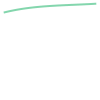

In [73]:
# Criar instância do SplineInterpolator
interpolator = lz.SplineInterpolator(
    default_method="bspline",  # Método de interpolação (bspline, cubic, weighted)
    default_smooth_factor="auto", # Grau da spline (3 = cúbica, suave)
    default_degree=3, # Grau padrão do spline
    min_input_points=3, # Número mínimo de pontos de entrada (default: 3)
    # Linha do Equador - Latitude de referência padrão
    default_reference_latitude= 0 # (default: 0.0).
)

# Interpolar a pentada exemplo
print(f"✏️ Interpolando Pentada {num_pentada} com B-spline...\n")

linha_zcit, stats_interp = interpolator.interpolate(
    # Lista de coordenadas (longitude, latitude).
    coordinates=coords_validas,
    # Parâmetros de interpolação (usa padrões se None).
    parameters=None,
    # Criar linhas de +1/-1 desvio padrão
    create_bounds_lines=True
)

print(f"✅ Interpolação completa!")
print(f"\n📊 Resultado:")
print(f"   - Método usado: {stats_interp['method_used']}")
print(f"   - Pontos de entrada: {stats_interp['input_points_count']}")
print(f"   - Pontos de saída: {stats_interp['output_points_count']}")
print(f"   - Linha ZCIT: {len(linha_zcit.coords)} coordenadas")

# --- RELATÓRIO DE QUALIDADE (VERSÃO SIMPLES) ---
quality = stats_interp['quality_assessment']
metrics = quality['metrics']

print("\n🎯 Relatório de Qualidade da Interpolação")
print("---------------------------------------------")

# Status Geral
status = "Válida" if quality['is_valid'] else "Inválida"
print(f"Status Geral: {status} ✅")

# Problemas Encontrados
if quality['issues']:
    print(f"Problemas: {', '.join(quality['issues'])} ⚠️")
else:
    print("Problemas: Nenhum problema detectado.")

print("\nMétricas Principais:")
print(f"  - Curvatura Máxima: {metrics.get('max_absolute_curvature', 0):.3f}")
print(f"  - Oscilação da Linha: {metrics.get('oscillation_ratio', 0):.3f}")
print(f"  - Maior Salto (Latitude): {metrics.get('max_latitude_gap', 0):.3f}°")
print("---------------------------------------------")

linha_zcit


---

## 📊 6. Síntese do Fluxo de Trabalho e Visualização dos Resultados 

**Analogia**: O módulo de **plotting** é como um **designer de apresentação** que:
- Pega o produto final (linha da ZCIT interpolada)
- Cria uma embalagem atraente (mapas com contexto geográfico)
- Adiciona rótulos e informações (títulos, legendas, coordenadas)
- Apresenta tudo de forma profissional e compreensível

In [58]:
from loczcit_iqr.plotting.visualizer import *

from loczcit_iqr.plotting import plot_zcit_quick, ZCITVisualizer, check_plotting_dependencies, TEMPLATES

# Verificar dependências
status = check_plotting_dependencies()

# Usar templates
print(TEMPLATES.keys())

=== LOCZCIT Plotting Dependencies Status ===

CORE Dependencies:
  ✓ matplotlib      v3.10.6
  ✓ cartopy         v0.25.0
  ✓ numpy           v2.3.3
  ✓ xarray          v2025.9.0
  ✓ pandas          v2.3.2
  ✓ shapely         v2.1.2

OPTIONAL Dependencies:
  ✓ geopandas       v1.1.1
  ✓ scipy           v1.16.2
  ✓ pillow          v11.3.0
  ✓ imageio         v2.37.0

dict_keys(['publication', 'presentation', 'web', 'report'])


In [74]:
# Exemplo de uso
viz = ZCITVisualizer(template='publication')
print(f"Visualizador criado com template: {viz.config}")

# Testar diferentes paletas
for palette_name in ['classic', 'modern', 'high_contrast', 'grayscale']:
    cmap = ZCITColormap.get_colormap(palette_name)
    print(f"Paleta '{palette_name}' carregada: {cmap.name}")


Visualizador criado com template: {'figsize': (12, 10), 'dpi': 300, 'font_size': 12, 'title_size': 16, 'colormap': 'classic', 'grid': True, 'coastlines': True, 'borders': True}
Paleta 'classic' carregada: olr_classic
Paleta 'modern' carregada: viridis_r
Paleta 'high_contrast' carregada: RdBu_r
Paleta 'grayscale' carregada: gray_r


## Análise por pentadas

2025-10-05 16:44:39,118 - loczcit_iqr.core.processor - INFO - Arquivo padrão da área de estudo encontrado: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet


INFO:loczcit_iqr.core.processor:Arquivo padrão da área de estudo encontrado: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet


Carregando dados diários para 2022...


2025-10-05 16:44:41,412 - loczcit_iqr.core.data_loader - INFO - Usando arquivo anual final: olr-daily_v01r02_20220101_20221231.nc
INFO:loczcit_iqr.core.data_loader:Usando arquivo anual final: olr-daily_v01r02_20220101_20221231.nc
2025-10-05 16:44:41,413 - loczcit_iqr.core.data_loader - INFO - Carregando dados de: data_cache\olr-daily_v01r02_20220101_20221231.nc
INFO:loczcit_iqr.core.data_loader:Carregando dados de: data_cache\olr-daily_v01r02_20220101_20221231.nc
2025-10-05 16:44:41,719 - loczcit_iqr.core.data_loader - INFO - Dados carregados com sucesso: FrozenMappingWarningOnValuesAccess({'time': 365, 'lat': 180, 'lon': 360, 'bnds': 2})
INFO:loczcit_iqr.core.data_loader:Dados carregados com sucesso: FrozenMappingWarningOnValuesAccess({'time': 365, 'lat': 180, 'lon': 360, 'bnds': 2})


Criando pentadas a partir dos dados diários...
2025-10-05 16:44:41,743 - loczcit_iqr.core.processor - INFO - Criando pentadas para 2022 (método: mean, remover bissextos: True)


INFO:loczcit_iqr.core.processor:Criando pentadas para 2022 (método: mean, remover bissextos: True)


2025-10-05 16:44:41,871 - loczcit_iqr.core.processor - INFO - Aplicando chunks do Dask para processamento paralelo


INFO:loczcit_iqr.core.processor:Aplicando chunks do Dask para processamento paralelo


2025-10-05 16:44:42,666 - loczcit_iqr.core.processor - INFO - Computando resultados Dask...


INFO:loczcit_iqr.core.processor:Computando resultados Dask...


2025-10-05 16:44:47,688 - loczcit_iqr.core.processor - INFO - Pentadas para 2022 criadas com sucesso


INFO:loczcit_iqr.core.processor:Pentadas para 2022 criadas com sucesso


2025-10-05 16:44:47,699 - loczcit_iqr.core.iqr_detector - INFO - IQRDetector inicializado com constante: 0.75
2025-10-05 16:44:47,699 - loczcit_iqr.core.spline_interpolator - INFO - SplineInterpolator inicializado: método='bspline', lat_ref=0.00°
2025-10-05 16:44:47,700 - loczcit_iqr.core.processor - INFO - Buscando mínimos de OLR (método: column_minimum, threshold: None, raio: 1px)


INFO:loczcit_iqr.core.processor:Buscando mínimos de OLR (método: column_minimum, threshold: None, raio: 1px)


2025-10-05 16:44:47,703 - loczcit_iqr.core.processor - INFO - Carregando área de estudo de: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet


INFO:loczcit_iqr.core.processor:Carregando área de estudo de: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet


2025-10-05 16:44:47,724 - loczcit_iqr.core.processor - INFO - Encontradas 11 coordenadas de mínimo


INFO:loczcit_iqr.core.processor:Encontradas 11 coordenadas de mínimo


2025-10-05 16:44:47,726 - loczcit_iqr.core.iqr_detector - INFO - Detectando outliers em 11 coordenadas (analisando latitude)
2025-10-05 16:44:47,726 - loczcit_iqr.core.iqr_detector - INFO - Detecção concluída: 9 válidas, 2 outliers
2025-10-05 16:44:47,727 - loczcit_iqr.core.processor - INFO - Buscando mínimos de OLR (método: local_minimum, threshold: 230, raio: 1px)


INFO:loczcit_iqr.core.processor:Buscando mínimos de OLR (método: local_minimum, threshold: 230, raio: 1px)


2025-10-05 16:44:47,728 - loczcit_iqr.core.processor - INFO - Aplicando threshold OLR <= 230 W/m²


INFO:loczcit_iqr.core.processor:Aplicando threshold OLR <= 230 W/m²


2025-10-05 16:44:47,729 - loczcit_iqr.core.processor - INFO - Carregando área de estudo de: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet


INFO:loczcit_iqr.core.processor:Carregando área de estudo de: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet


2025-10-05 16:44:47,747 - loczcit_iqr.core.processor - INFO - Encontradas 5 coordenadas de mínimo


INFO:loczcit_iqr.core.processor:Encontradas 5 coordenadas de mínimo


2025-10-05 16:44:47,748 - loczcit_iqr.core.spline_interpolator - INFO - Interpolando 9 coordenadas: método=bspline, pontos_saída=100


INFO:loczcit_iqr.plotting.visualizer:Nenhum caminho fornecido. Usando área de estudo padrão.
INFO:loczcit_iqr.plotting.visualizer:Área de estudo de 'E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet' plotada com sucesso.



Iniciando a criação da visualização completa...
✅ Visualização completa pronta.


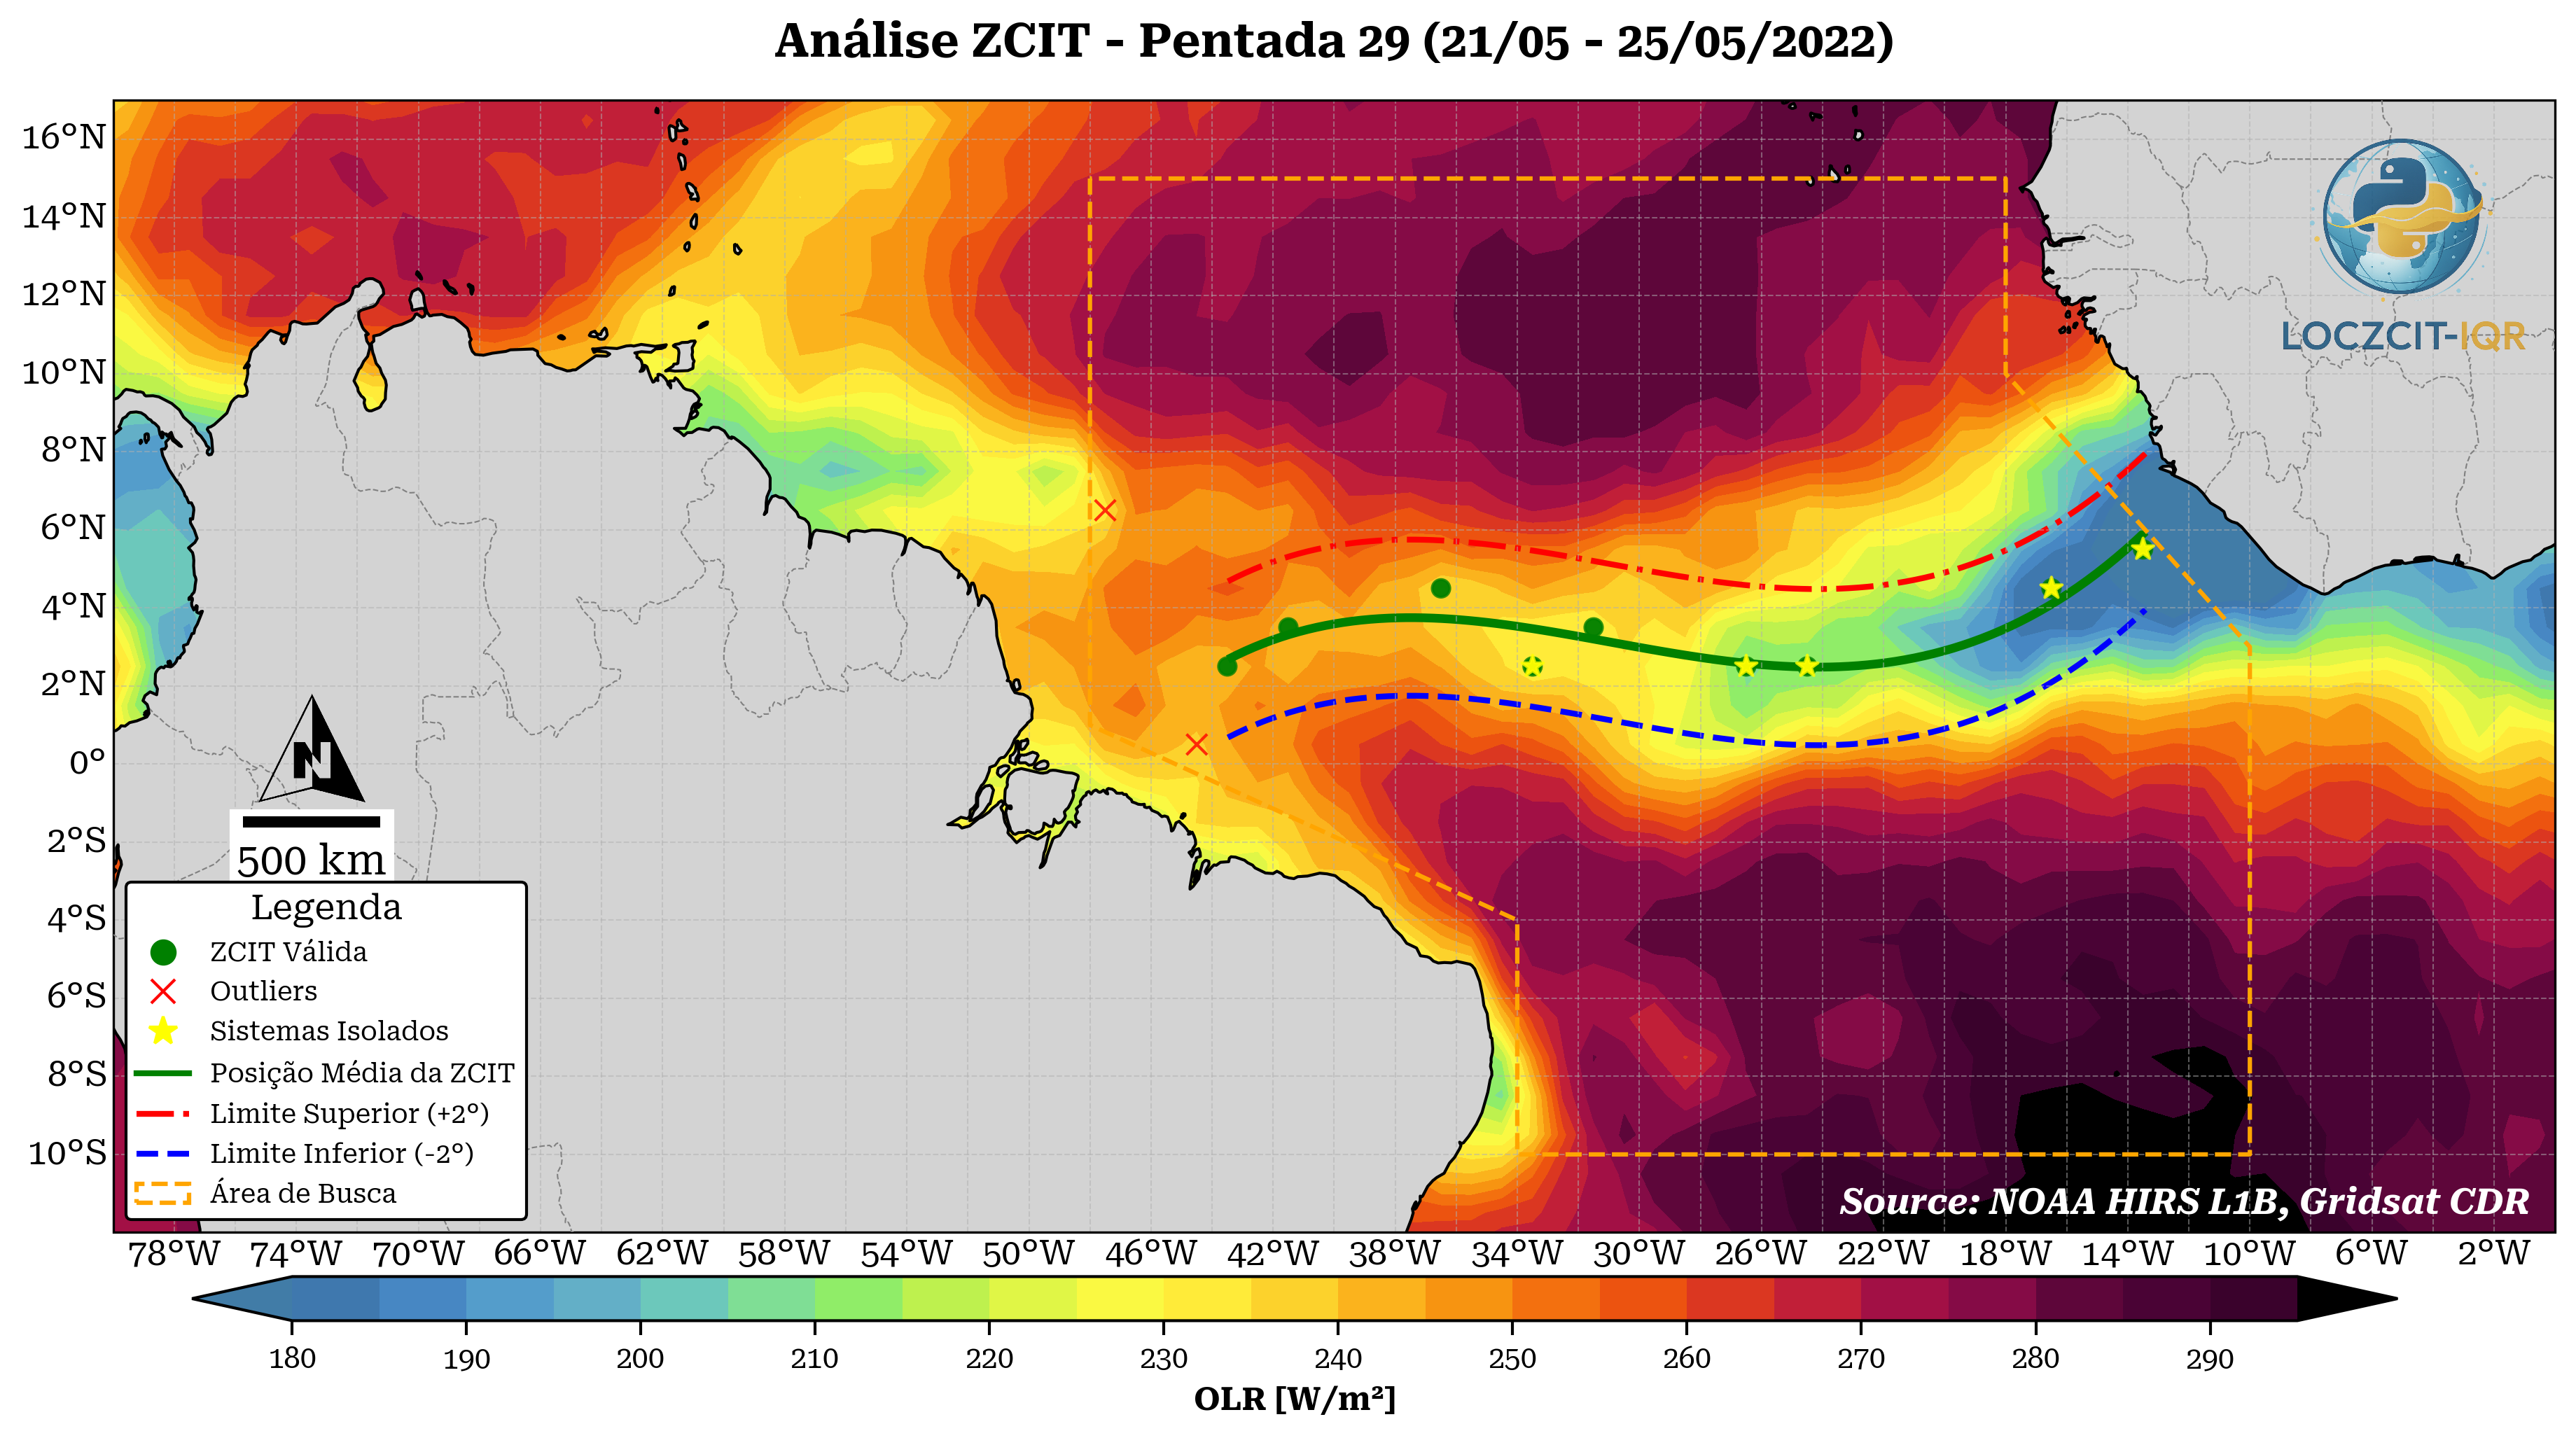

In [78]:
from loczcit_iqr.core.data_loader import NOAADataLoader
from loczcit_iqr.core.processor import DataProcessor
from loczcit_iqr.core.iqr_detector import IQRDetector
from loczcit_iqr.core.spline_interpolator import SplineInterpolator, SplineParameters, InterpolationMethod
from loczcit_iqr.plotting.visualizer import ZCITVisualizer
import matplotlib.pyplot as plt
import pandas as pd

# --- Carregar e Processar Dados de Pentadas ---
ano = 2022
loader = NOAADataLoader()
processor = DataProcessor()

print(f"Carregando dados diários para {ano}...")
olr_data = loader.load_data(start_date=f"{ano}-01-01", end_date=f"{ano}-12-31")

print("Criando pentadas a partir dos dados diários...")
pentads_year = processor.create_pentads(
    olr_data=olr_data, 
    year=ano,
    remove_leap_days=True,
    method='mean',
    min_days_required=3
)

# =============================================================================
# ANÁLISE DA ZCIT
# =============================================================================
PENTADA_ALVO = 29
detector = IQRDetector(constant=0.75)
interpolator = SplineInterpolator()

# ⚠️ extrair o campo OLR 2D da pentada específica
olr_pentada = pentads_year['olr'].sel(pentada=PENTADA_ALVO)

min_coords = processor.find_minimum_coordinates(
    olr_pentada,
    threshold=None,
    method='column_minimum',
    search_radius=1
)

coords_valid, coords_outliers, resumo = detector.detect_outliers(min_coords)

sistemas_convectivos = processor.find_minimum_coordinates(
    olr_pentada,
    threshold=230,
    method='local_minimum',
    search_radius=1
)

params_bspline = SplineParameters(
    method=InterpolationMethod.BSPLINE,
    smooth_factor='high',
    degree=3,
    max_curvature_threshold=30,
    num_points_output=100,
    extrapolate_flag=True,
    reference_latitude=0
)

zcit_line, _ = interpolator.interpolate(coords_valid, parameters=params_bspline)

# =============================================================================
# CRIAR TÍTULO MANUALMENTE
# =============================================================================
# Obter as datas da pentada para o título
from loczcit_iqr.utils import pentada_to_dates

start_date, end_date = pentada_to_dates(PENTADA_ALVO, ano)
titulo_customizado = (
    f"Análise ZCIT - Pentada {PENTADA_ALVO} "
    f"({start_date.strftime('%d/%m')} - {end_date.strftime('%d/%m/%Y')})"
)

# =============================================================================
# VISUALIZAÇÃO
# =============================================================================
viz = ZCITVisualizer(template='publication')

# ✅ Agora passamos apenas o DataArray 2D e o título pronto
fig, ax = viz.plot_complete_analysis(
    olr_data=olr_pentada,  # ⚠️ DataArray 2D, NÃO o dataset completo
    title=titulo_customizado,  # ⚠️ Título customizado
    coords_valid=coords_valid,
    coords_outliers=coords_outliers,
    sistemas_convectivos=sistemas_convectivos,
    zcit_line=zcit_line,
    study_area_visible=True,
    save_path=None
)

plt.show()

## Monitoramento pelo último período disponível: últimos 5 dias no dataset

✅ 18 fontes da biblioteca loczcit_iqr registradas com sucesso.
🎨 Estilo tipográfico profissional loczcit_iqr aplicado.
🌊 LOCZCIT-IQR v0.0.1 carregada!
   📖 Use lz.quick_start_guide() para começar
   🔧 Use lz.check_modules() para verificar módulos
2025-10-06 14:55:07,282 - loczcit_iqr.core.processor - INFO - Arquivo padrão da área de estudo encontrado: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet
Carregando dados diários para 2025...


2025-10-06 14:55:13,693 - loczcit_iqr.core.data_loader - INFO - Buscando arquivo para o ano corrente (2025)...
2025-10-06 14:55:13,693 - loczcit_iqr.core.data_loader - INFO - Arquivo do ano corrente encontrado: olr-daily_v01r02-preliminary_20250101_20250907.nc
2025-10-06 14:55:13,694 - loczcit_iqr.core.data_loader - INFO - Carregando dados de: data_cache\olr-daily_v01r02-preliminary_20250101_20250907.nc
2025-10-06 14:55:14,202 - loczcit_iqr.core.data_loader - INFO - Dados carregados com sucesso: FrozenMappingWarningOnValuesAccess({'time': 250, 'lat': 180, 'lon': 360, 'bnds': 2})



Calculando a média de OLR para o período mais recente...
2025-10-06 14:55:14,206 - loczcit_iqr.core.processor - INFO - Processando os últimos 5 dias: 2025-09-03 a 2025-09-07
2025-10-06 14:55:14,207 - loczcit_iqr.core.processor - INFO - Calculando mean para 5 dias (2025-09-03 a 2025-09-07)
Média recente calculada com sucesso.

Iniciando análise para o período recente...
2025-10-06 14:55:14,211 - loczcit_iqr.core.iqr_detector - INFO - IQRDetector inicializado com constante: 1.5
2025-10-06 14:55:14,212 - loczcit_iqr.core.spline_interpolator - INFO - SplineInterpolator inicializado: método='bspline', lat_ref=0.00°
2025-10-06 14:55:14,212 - loczcit_iqr.core.processor - INFO - Buscando mínimos de OLR (método: column_minimum, threshold: None, raio: 1px)
2025-10-06 14:55:14,213 - loczcit_iqr.core.processor - INFO - Carregando área de estudo de: E:\ambiente_python_2025-main\src\data\shapefiles\Area_LOCZCIT.parquet
2025-10-06 14:55:14,481 - loczcit_iqr.core.processor - INFO - Encontradas 8 coor

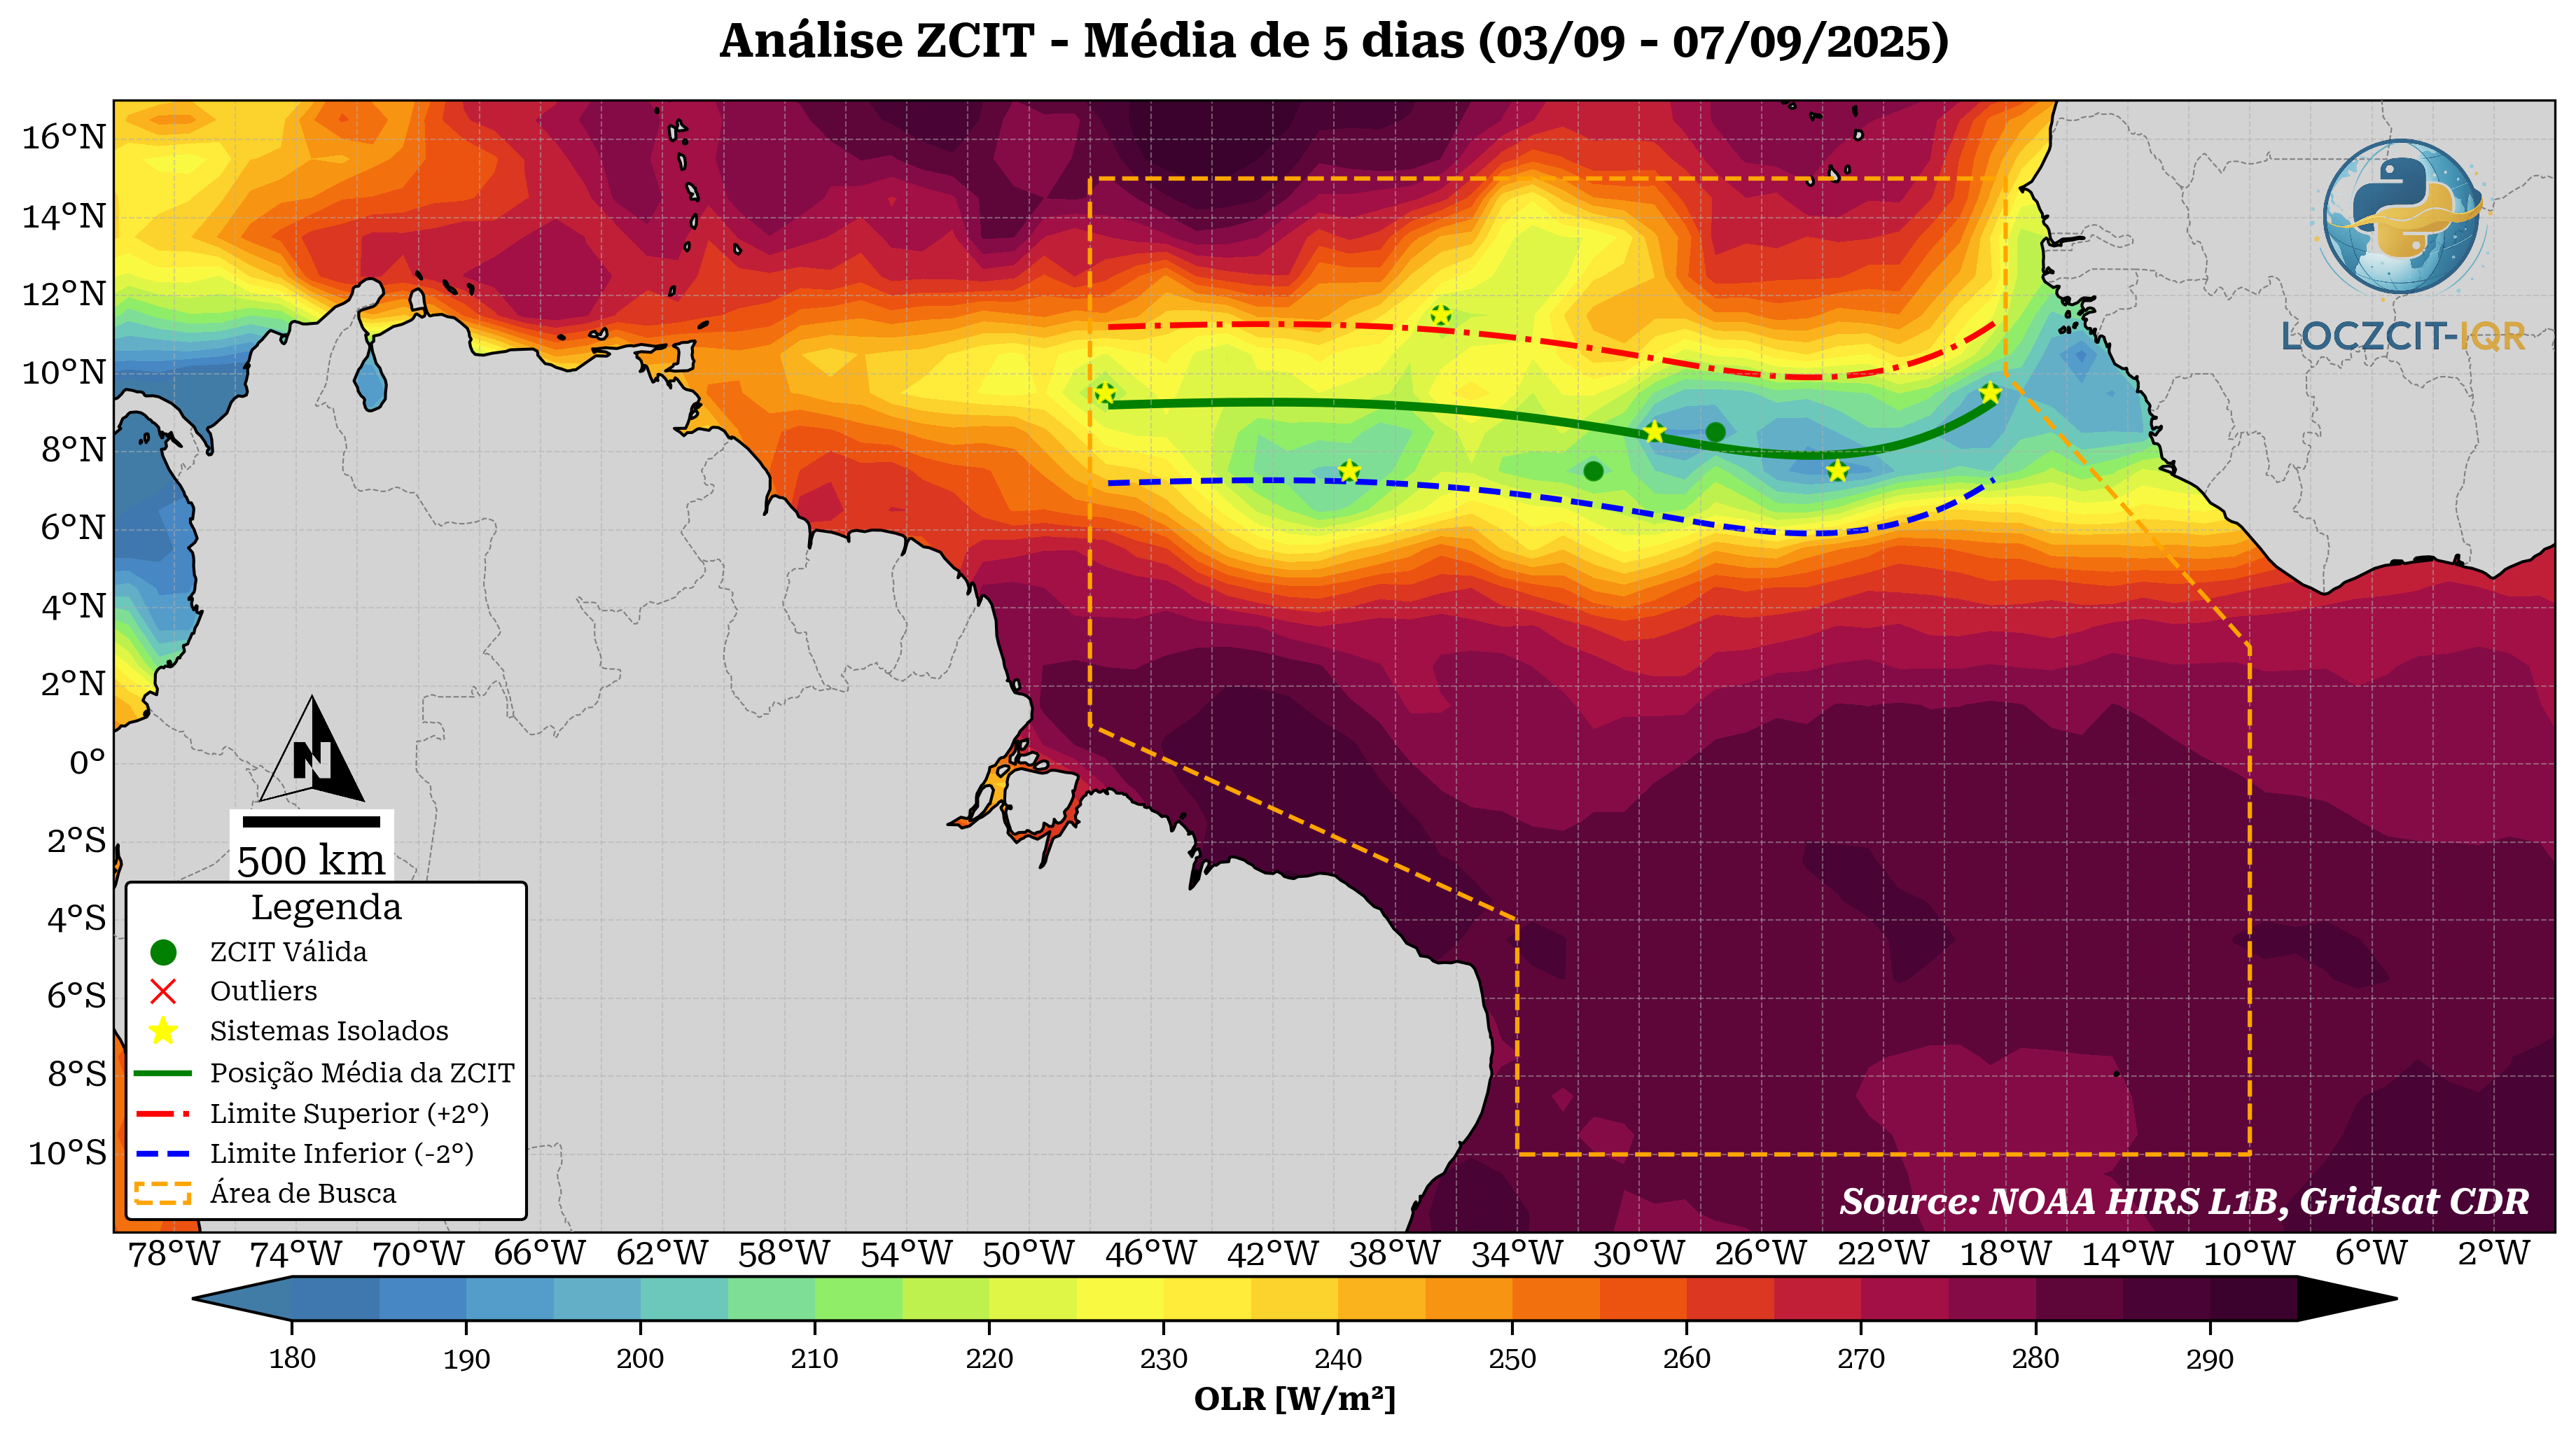

In [1]:
import pandas as pd
import os

from loczcit_iqr.core.data_loader import NOAADataLoader
from loczcit_iqr.core.processor import DataProcessor
from loczcit_iqr.core.iqr_detector import IQRDetector
from loczcit_iqr.core.spline_interpolator import SplineInterpolator, SplineParameters, InterpolationMethod
from loczcit_iqr.plotting.visualizer import *

# =============================================================================
# 1. CARREGAMENTO E PROCESSAMENTO
# =============================================================================
ano = 2025
loader = NOAADataLoader()
processor = DataProcessor()
print(f"Carregando dados diários para {ano}...")
olr_data = loader.load_data(start_date=f"{ano}-01-01", end_date=f"{ano}-12-31")
print("\nCalculando a média de OLR para o período mais recente...")
olr_recente = processor.process_latest_period(olr_data, num_days=5)
print("Média recente calculada com sucesso.")

# =============================================================================
# 2. ANÁLISE DA ZCIT
# =============================================================================
print(f"\nIniciando análise para o período recente...")
detector = IQRDetector()
interpolator = SplineInterpolator()
min_coords = processor.find_minimum_coordinates(
    data_array=olr_recente, method='column_minimum', search_radius=1
)
coords_valid, coords_outliers, resumo = detector.detect_outliers(min_coords)
sistemas_convectivos = processor.find_minimum_coordinates(
    data_array=olr_recente, threshold=230, method='local_minimum', search_radius=2
)
params_bspline = SplineParameters(
    method=InterpolationMethod.BSPLINE, smooth_factor='high', degree=3, 
    num_points_output=100, extrapolate_flag=True, reference_latitude=0
)
zcit_line, _ = interpolator.interpolate(coords_valid, parameters=params_bspline)
print("Análise concluída.")

# =============================================================================
# 3. VISUALIZAÇÃO
# =============================================================================

# --- Preparar o título ---
start_str = olr_recente.attrs['period_start']
end_str = olr_recente.attrs['period_end']
start_date_title = pd.to_datetime(start_str)
end_date_title = pd.to_datetime(end_str)
titulo_customizado = (
    f"Análise ZCIT - Média de 5 dias "
    f"({start_date_title.strftime('%d/%m')} - {end_date_title.strftime('%d/%m/%Y')})"
)

# --- Chamar o método "mestre" ---
viz = ZCITVisualizer(template='publication')
fig, ax = viz.plot_complete_analysis(
    olr_data=olr_recente,
    title=titulo_customizado,
    coords_valid=coords_valid,
    coords_outliers=coords_outliers,
    sistemas_convectivos=sistemas_convectivos,
    zcit_line=zcit_line,
    study_area_visible=True,
    save_path=None # ou 'minha_figura.png' para salvar
)

# --- Mostrar o Gráfico ---
plt.show()

In [ ]:
# ============================================================================
# IMPORTS: ERA5DataLoader
# ============================================================================
from loczcit_iqr.core.data_loader_era5 import ERA5DataLoader 
from loczcit_iqr.core.processor import DataProcessor
from loczcit_iqr.core.iqr_detector import IQRDetector
from loczcit_iqr.core.spline_interpolator import (
    SplineInterpolator, 
    SplineParameters, 
    InterpolationMethod
)
from loczcit_iqr.plotting.visualizer import ZCITVisualizer
import matplotlib.pyplot as plt
import pandas as pd

# ============================================================================
# 0. CONFIGURAÇÃO DO ERA5 - ADIÇÃO NECESSÁRIA
# ============================================================================
# Configure suas credenciais do CDS (Climate Data Store)
# Obtenha em: https://cds.climate.copernicus.eu/api-how-to

CDS_URL = "https://cds.climate.copernicus.eu/api"
CDS_KEY = "c3defdb3-7201-4560-989d-861c32c2110f"  # ⚠️ Sua chave real

# ============================================================================
# 1. CARREGAR E PROCESSAR DADOS DE PENTADAS
# ============================================================================
ano = 2022

# ⚠️ MUDANÇA: Inicializar com credenciais
loader = ERA5DataLoader(cds_url=CDS_URL, cds_key=CDS_KEY)
processor = DataProcessor()

print(f"Carregando dados diários ERA5 para {ano}...")

# ✅ IDÊNTICO: Mesmo formato de data
olr_data = loader.load_data(
    start_date=f"{ano}-01-01", 
    end_date=f"{ano}-12-31"
)

print("Criando pentadas a partir dos dados diários ERA5...")

# ✅ IDÊNTICO: Mesma função, mesmos parâmetros
pentads_year = processor.create_pentads(
    olr_data=olr_data, 
    year=ano,
    remove_leap_days=True,
    method='mean',
    min_days_required=3
)

# ============================================================================
# 2. ANÁLISE DA ZCIT - COMPLETAMENTE IDÊNTICO
# ============================================================================
PENTADA_ALVO = 29
detector = IQRDetector(constant=0.75)
interpolator = SplineInterpolator()

# ⚠️ Extrair o campo OLR 2D da pentada específica
olr_pentada = pentads_year['olr'].sel(pentada=PENTADA_ALVO)

min_coords = processor.find_minimum_coordinates(
    olr_pentada,
    threshold=None,
    method='column_minimum',
    search_radius=1
)

coords_valid, coords_outliers, resumo = detector.detect_outliers(min_coords)

sistemas_convectivos = processor.find_minimum_coordinates(
    olr_pentada,
    threshold=230,
    method='local_minimum',
    search_radius=1
)

params_bspline = SplineParameters(
    method=InterpolationMethod.BSPLINE,
    smooth_factor='high',
    degree=3,
    max_curvature_threshold=30,
    num_points_output=100,
    extrapolate_flag=True,
    reference_latitude=0
)

zcit_line, _ = interpolator.interpolate(coords_valid, parameters=params_bspline)

# ============================================================================
# 3. CRIAR TÍTULO MANUALMENTE - COMPLETAMENTE IDÊNTICO
# ============================================================================
from loczcit_iqr.utils import pentada_to_dates

start_date, end_date = pentada_to_dates(PENTADA_ALVO, ano)
titulo_customizado = (
    f"Análise ZCIT - Pentada {PENTADA_ALVO} "
    f"({start_date.strftime('%d/%m')} - {end_date.strftime('%d/%m/%Y')})"
)

# ============================================================================
# 4. VISUALIZAÇÃO - ÚNICA MUDANÇA: credits="ERA5"
# ============================================================================
viz = ZCITVisualizer(template='publication')

fig, ax = viz.plot_complete_analysis(
    olr_data=olr_pentada,           # ✅ DataArray 2D
    title=titulo_customizado,        # ✅ Título customizado
    coords_valid=coords_valid,
    coords_outliers=coords_outliers,
    sistemas_convectivos=sistemas_convectivos,
    zcit_line=zcit_line,
    study_area_visible=True,
    credits="ERA5",                  # <-- MUDANÇA AQUI! 🎯
    save_path=None                   # ou 'pentada_29_era5.png'
)

plt.show()